# Fundamentals of machine learning

# PR_HW5

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 1s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 9s 15ms/step - loss: 0.6367 - accuracy: 0.8113 - val_loss: 0.3211 - val_accuracy: 0.9082
Epoch 2/10
375/375 [==============================] - 6s 15ms/step - loss: 0.2547 - accuracy: 0.9218 - val_loss: 0.1751 - val_accuracy: 0.9482
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1642 - accuracy: 0.9480 - val_loss: 0.1517 - val_accuracy: 0.9552
Epoch 4/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1176 - accuracy: 0.9633 - val_loss: 0.1331 - val_accuracy: 0.9608
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0876 - accuracy: 0.9713 - val_loss: 0.1492 - val_accuracy: 0.9567
Epoch 6/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0624 - accuracy: 0.9798 - val_loss: 0.1233 - val_accuracy: 0.9654
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0473 - accuracy: 0.9848 - val_loss: 0.1389 - val_accuracy: 0.9632

**Plotting a validation accuracy comparison**

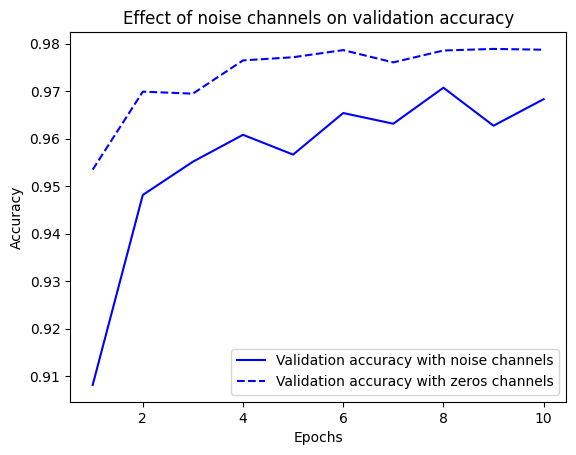

In [4]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 8ms/step - loss: 2.3173 - accuracy: 0.1021 - val_loss: 2.3088 - val_accuracy: 0.1035
Epoch 2/100
375/375 [==============================] - 3s 8ms/step - loss: 2.3008 - accuracy: 0.1176 - val_loss: 2.3086 - val_accuracy: 0.1043
Epoch 3/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2918 - accuracy: 0.1275 - val_loss: 2.3167 - val_accuracy: 0.1061
Epoch 4/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2779 - accuracy: 0.1399 - val_loss: 2.3262 - val_accuracy: 0.1038
Epoch 5/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2603 - accuracy: 0.1531 - val_loss: 2.3325 - val_accuracy: 0.1033
Epoch 6/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2398 - accuracy: 0.1679 - val_loss: 2.3509 - val_accuracy: 0.1011
Epoch 7/100
375/375 [==============================] - 6s 17ms/step - loss: 2.2148 - accuracy: 0.1828 - val_loss: 2.3704 - val_accuracy: 0.10

Epoch 58/100
375/375 [==============================] - 3s 7ms/step - loss: 0.9662 - accuracy: 0.6780 - val_loss: 4.6057 - val_accuracy: 0.0973
Epoch 59/100
375/375 [==============================] - 3s 7ms/step - loss: 0.9516 - accuracy: 0.6825 - val_loss: 4.6648 - val_accuracy: 0.0937
Epoch 60/100
375/375 [==============================] - 3s 7ms/step - loss: 0.9396 - accuracy: 0.6868 - val_loss: 4.6745 - val_accuracy: 0.0957
Epoch 61/100
375/375 [==============================] - 3s 8ms/step - loss: 0.9250 - accuracy: 0.6913 - val_loss: 4.7986 - val_accuracy: 0.0978
Epoch 62/100
375/375 [==============================] - 3s 8ms/step - loss: 0.9107 - accuracy: 0.6981 - val_loss: 4.8255 - val_accuracy: 0.0975
Epoch 63/100
375/375 [==============================] - 3s 7ms/step - loss: 0.8955 - accuracy: 0.7006 - val_loss: 4.8953 - val_accuracy: 0.0942
Epoch 64/100
375/375 [==============================] - 3s 7ms/step - loss: 0.8807 - accuracy: 0.7081 - val_loss: 4.9374 - val_accuracy:

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 11s 23ms/step - loss: 671.3722 - accuracy: 0.3457 - val_loss: 2.1724 - val_accuracy: 0.1819
Epoch 2/10
375/375 [==============================] - 7s 19ms/step - loss: 4.4990 - accuracy: 0.1931 - val_loss: 2.2622 - val_accuracy: 0.2211
Epoch 3/10
375/375 [==============================] - 7s 18ms/step - loss: 3.2021 - accuracy: 0.2067 - val_loss: 2.3406 - val_accuracy: 0.2338
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4590 - accuracy: 0.1894 - val_loss: 2.3556 - val_accuracy: 0.1691
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 2.7244 - accuracy: 0.1722 - val_loss: 2.3116 - val_accuracy: 0.1637
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 2.5266 - accuracy: 0.1875 - val_loss: 2.6419 - val_accuracy: 0.2253
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 2.6807 - accuracy: 0.1875 - val_loss: 2.3722 - val_accuracy: 0.1542


**The same model with a more appropriate learning rate**

In [7]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 0.3805 - accuracy: 0.9122 - val_loss: 0.1748 - val_accuracy: 0.9543
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1426 - accuracy: 0.9634 - val_loss: 0.1313 - val_accuracy: 0.9696
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1113 - accuracy: 0.9731 - val_loss: 0.1748 - val_accuracy: 0.9636
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0961 - accuracy: 0.9787 - val_loss: 0.2331 - val_accuracy: 0.9592
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0916 - accuracy: 0.9816 - val_loss: 0.1860 - val_accuracy: 0.9736
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0790 - accuracy: 0.9843 - val_loss: 0.2588 - val_accuracy: 0.9685
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0735 - accuracy: 0.9859 - val_loss: 0.2282 - val_accuracy: 0.9743
Epoch

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [8]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6793 - accuracy: 0.8294 - val_loss: 0.3572 - val_accuracy: 0.9036
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3514 - accuracy: 0.9043 - val_loss: 0.3058 - val_accuracy: 0.9154
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3158 - accuracy: 0.9123 - val_loss: 0.2884 - val_accuracy: 0.9204
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2999 - accuracy: 0.9164 - val_loss: 0.2798 - val_accuracy: 0.9231
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2899 - accuracy: 0.9190 - val_loss: 0.2759 - val_accuracy: 0.9229
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2835 - accuracy: 0.9200 - val_loss: 0.2711 - val_accuracy: 0.9248
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2782 - accuracy: 0.9219 - val_loss: 0.2713 - val_accuracy: 0.9241
Epoch 

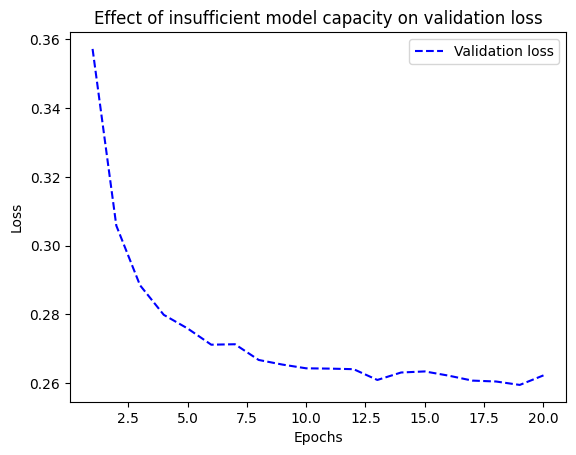

In [9]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [10]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3585 - accuracy: 0.8979 - val_loss: 0.2003 - val_accuracy: 0.9404
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1589 - accuracy: 0.9527 - val_loss: 0.1366 - val_accuracy: 0.9601
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1102 - accuracy: 0.9675 - val_loss: 0.1028 - val_accuracy: 0.9682
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0838 - accuracy: 0.9751 - val_loss: 0.1083 - val_accuracy: 0.9683
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0670 - accuracy: 0.9802 - val_loss: 0.0883 - val_accuracy: 0.9734
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0550 - accuracy: 0.9834 - val_loss: 0.1001 - val_accuracy: 0.9708
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0460 - accuracy: 0.9856 - val_loss: 0.0924 - val_accuracy: 0.9738
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [11]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 2s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.5081 - accuracy: 0.7988 - val_loss: 0.3738 - val_accuracy: 0.8738
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2995 - accuracy: 0.9042 - val_loss: 0.3018 - val_accuracy: 0.8840
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2193 - accuracy: 0.9291 - val_loss: 0.3273 - val_accuracy: 0.8656
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1678 - accuracy: 0.9462 - val_loss: 0.2751 - val_accuracy: 0.8909
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1393 - accuracy: 0.9558 - val_loss: 0.2835 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1086 - accuracy: 0.9667 - val_loss: 0.2986 - val_accuracy: 0.8843
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0903 - accurac

**Version of the model with lower capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 137ms/step - loss: 0.6470 - accuracy: 0.6209 - val_loss: 0.6113 - val_accuracy: 0.7639
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5764 - accuracy: 0.7480 - val_loss: 0.5647 - val_accuracy: 0.8025
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5295 - accuracy: 0.8061 - val_loss: 0.5358 - val_accuracy: 0.7485
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4925 - accuracy: 0.8415 - val_loss: 0.5056 - val_accuracy: 0.8231
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4625 - accuracy: 0.8702 - val_loss: 0.4900 - val_accuracy: 0.8229
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4372 - accuracy: 0.8907 - val_loss: 0.4713 - val_accuracy: 0.8576
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4143 - accuracy: 0.9110 - val_loss: 0.4620 - val_accuracy: 0.8569
Epoch 8/20
3

**Version of the model with higher capacity**

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 13s 336ms/step - loss: 0.5530 - accuracy: 0.7575 - val_loss: 0.5895 - val_accuracy: 0.7150
Epoch 2/20
30/30 [==============================] - 6s 202ms/step - loss: 0.2532 - accuracy: 0.8987 - val_loss: 0.2669 - val_accuracy: 0.8942
Epoch 3/20
30/30 [==============================] - 6s 206ms/step - loss: 0.1719 - accuracy: 0.9344 - val_loss: 0.2718 - val_accuracy: 0.8914
Epoch 4/20
30/30 [==============================] - 6s 204ms/step - loss: 0.0900 - accuracy: 0.9722 - val_loss: 0.3535 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 6s 208ms/step - loss: 0.1112 - accuracy: 0.9745 - val_loss: 0.2938 - val_accuracy: 0.8852
Epoch 6/20
30/30 [==============================] - 6s 207ms/step - loss: 0.0087 - accuracy: 0.9994 - val_loss: 0.4634 - val_accuracy: 0.8877
Epoch 7/20
30/30 [==============================] - 6s 201ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.5829 - val_accuracy: 0.8874
Epoch

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [14]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 7s 133ms/step - loss: 0.5849 - accuracy: 0.7899 - val_loss: 0.4589 - val_accuracy: 0.8675
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3938 - accuracy: 0.8944 - val_loss: 0.3859 - val_accuracy: 0.8850
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3301 - accuracy: 0.9145 - val_loss: 0.3599 - val_accuracy: 0.8907
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2957 - accuracy: 0.9257 - val_loss: 0.3645 - val_accuracy: 0.8795
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2761 - accuracy: 0.9317 - val_loss: 0.3793 - val_accuracy: 0.8727
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2614 - accuracy: 0.9363 - val_loss: 0.3693 - val_accuracy: 0.8808
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2536 - accuracy: 0.9394 - val_loss: 0.3666 - val_accuracy: 0.8805
Epoch 8/20
3

**Different weight regularizers available in Keras**

In [15]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 6s 96ms/step - loss: 0.6126 - accuracy: 0.6601 - val_loss: 0.4730 - val_accuracy: 0.8500
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.4820 - accuracy: 0.7884 - val_loss: 0.3643 - val_accuracy: 0.8785
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4042 - accuracy: 0.8396 - val_loss: 0.3207 - val_accuracy: 0.8835
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3445 - accuracy: 0.8713 - val_loss: 0.2883 - val_accuracy: 0.8918
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2961 - accuracy: 0.8929 - val_loss: 0.2784 - val_accuracy: 0.8921
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2596 - accuracy: 0.9074 - val_loss: 0.2770 - val_accuracy: 0.8918
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2359 - accuracy: 0.9217 - val_loss: 0.2752 - val_accuracy: 0.8942
Epoch 8/20
30